In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns

# suppress warning
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# get them back from the cloud
# the reduced version should only have 10 columns
saved_2017 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2017_reduced.csv"
saved_2018 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2018_reduced.csv"
saved_2019 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2019_reduced.csv"
saved_2020 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2020_reduced.csv"
saved_2021 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2021_reduced.csv"
saved_2022 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2022_reduced.csv"
saved_2023 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2023_reduced.csv"
saved_2024 = "/content/drive/My Drive/X999/311_different_years/filtered_df_2024_reduced.csv"

In [4]:
df_2017 = pd.read_csv(saved_2017)
df_2018 = pd.read_csv(saved_2018)
df_2019 = pd.read_csv(saved_2019)
df_2020 = pd.read_csv(saved_2020)
df_2021 = pd.read_csv(saved_2021)
df_2022 = pd.read_csv(saved_2022)
df_2023 = pd.read_csv(saved_2023)
df_2024 = pd.read_csv(saved_2024)

In [5]:
df_2017.shape, df_2018.shape, df_2019.shape, df_2020.shape, df_2021.shape, df_2022.shape, df_2023.shape, df_2024.shape

((1032946, 10),
 (1066249, 10),
 (996996, 10),
 (1263463, 10),
 (1355688, 10),
 (1433295, 10),
 (1412135, 10),
 (1527906, 10))

In [256]:
non_covid_df = pd.concat([df_2017, df_2018, df_2019, df_2023, df_2024])
non_covid_df.shape

(6036232, 10)

In [257]:
duplicate_count = non_covid_df.duplicated('unique_key').sum()
duplicate_count # 0

np.int64(0)

In [258]:
non_covid_df = non_covid_df[non_covid_df['complaint_type'] != 'Noise - Commercial']
non_covid_df.shape

(5785456, 10)

In [260]:
f"removed {6036232 - 6036232} rows with 'Noise - Commercial' complaint type"

"removed 0 rows with 'Noise - Commercial' complaint type"

In [261]:
non_covid_df.shape, non_covid_df.columns

((5785456, 10),
 Index(['unique_key', 'created_date', 'closed_date', 'complaint_type',
        'incident_zip', 'incident_address', 'bbl', 'borough', 'latitude',
        'longitude'],
       dtype='object'))

In [263]:
non_covid_df.bbl[0].dtype

dtype('int64')

In [264]:
non_covid_df.bbl =non_covid_df.bbl.astype('int64')

In [265]:
saved_bbl_evictions = "/content/drive/My Drive/X999/bbl_evictions_merged.csv"

In [266]:
bbl_evictions = pd.read_csv(saved_bbl_evictions)

In [267]:
bbl_evictions.shape

(74082, 40)

In [268]:
bbl_evictions.columns

Index(['court_index_number', 'docket_number', 'eviction_address',
       'eviction_apartment_number', 'executed_date', 'borough',
       'eviction_postcode', 'ejectment', 'eviction/legal_possession',
       'latitude', 'longitude', 'community_board', 'council_district',
       'census_tract', 'bin', 'bbl', 'nta', 'geometry', 'eviction_count',
       'year', 'average_year_eviction_count', 'bbl_clean', 'yearbuilt',
       'bldgclass', 'numfloors', 'unitsres', 'ownername', 'bldgarea',
       'building_type', 'building_category', 'is_condo', 'floor_category',
       'rent_era', 'architectural_style', 'economic_period',
       'residential_units_category', 'is_llc', 'building_size_category',
       'size_quartile', 'decade'],
      dtype='object')

In [269]:
bbl_evictions.bbl_clean[0].dtype, covid_df.bbl[0].dtype, covid_df.bbl[0]

(dtype('int64'),
 dtype('int64'),
 0    2029820027
 0    2027030018
 0    1021650063
 Name: bbl, dtype: int64)

In [270]:
non_covid_df.bbl = non_covid_df.bbl.astype('int64')

In [271]:
non_covid_df.bbl[0].dtype

dtype('int64')

In [272]:
non_covid_df.bbl, bbl_evictions.bbl_clean

(0          1019200007
 1          1017540155
 2          2050540041
 3          3066870049
 4          3050860041
               ...    
 1527901    4090210002
 1527902    4013110066
 1527903    4091250055
 1527904    3043710001
 1527905    2032367501
 Name: bbl, Length: 5785456, dtype: int64,
 0        2047200001
 1        2029990111
 2        1016160001
 3        3046980037
 4        2026110033
             ...    
 74077    1020510138
 74078    1010420061
 74079    3013810057
 74080    1002060004
 74081    1021390329
 Name: bbl_clean, Length: 74082, dtype: int64)

In [279]:
# pandas.Series.isin() returns a boolean mask of values in the first series that also appear in the second
overlap_mask = bbl_evictions.bbl_clean.isin(non_covid_df.bbl)
overlapping_values = bbl_evictions.bbl_clean[overlap_mask]
num_overlaps = overlap_mask.sum()
# pretty good, given the bbl_evictions_df.shape is (74082, 40)
num_overlaps, (69502/ 74082) # 68.586% of residential buildings that had evictions also had 311 complaints

(np.int64(69502), 0.9381766151021841)

In [280]:
non_covid_df.head()

,unique_key,created_date,closed_date,complaint_type,incident_zip,incident_address,bbl,borough,latitude,longitude
0,38070156,2017-12-31 23:59:35,2018-01-04 19:27:02,HEAT/HOT WATER,10030.0,181 WEST 135 STREET,1019200007,MANHATTAN,40.815127,-73.943252
1,38067146,2017-12-31 23:59:34,2018-01-01 00:57:19,Noise - Residential,10035.0,2048 MADISON AVENUE,1017540155,MANHATTAN,40.808655,-73.938532
2,38066214,2017-12-31 23:59:15,2018-01-01 02:48:23,Noise - Residential,10466.0,1902 NEREID AVENUE,2050540041,BRONX,40.898700,-73.848528
3,38067041,2017-12-31 23:58:38,2018-01-01 02:53:28,Noise - Street/Sidewalk,11230.0,1201 AVENUE H,3066870049,BROOKLYN,40.629675,-73.964939
4,38068229,2017-12-31 23:58:33,2018-01-08 13:30:58,HEAT/HOT WATER,11226.0,70 LINDEN BOULEVARD,3050860041,BROOKLYN,40.652289,-73.956328


### 68.856% of the buildings that had evictions also had 311 complaints during Covid

In [281]:
# or use sets, but this only shows the unique overlapped bbl numbers
# (faster for large datasets)
set1 = set(bbl_evictions.bbl_clean)
set2 = set(non_covid_df.bbl)
unique_overlap = set1.intersection(set2)
len(unique_overlap)

29131

In [283]:
# numpy.intersect1d()
overlapping_values = np.intersect1d(bbl_evictions.bbl_clean, non_covid_df.bbl)
len(overlapping_values)

29131

In [284]:
bbl_evictions.head()

,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,eviction_postcode,ejectment,eviction/legal_possession,latitude,...,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade
0,34859/16,53416,3476 SEYMOUR AVENUE,3-B,2017-01-03,BRONX,10469,Not an Ejectment,Possession,40.877620,...,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,True,mega,Q4 (largest 25%),1930-1939
1,B57808/16,74242,1426 BRYANT AVENUE,10 AKA 2ND FL UNIT,2017-01-03,BRONX,10459,Not an Ejectment,Possession,40.830691,...,False,low-rise,"1994–Present, vacancy decontrol","1981–2000, Post-Modernism","1991–2008, modern economic growth",2-unit,False,small,Q3 (50-75%),1990-1999
2,N069212/14,355977,1309 5TH AVENUE,24H,2017-01-03,MANHATTAN,10029,Not an Ejectment,Possession,40.797309,...,False,high-rise,"1970–1993, deregularization","1951–1980, the International Style, Alternativ...","1946–1975, pst war economic boom",100+ units,False,mega,Q4 (largest 25%),1970-1979
3,K065455/16,367441,458 EAST 51 STREET,6A,2017-01-03,BROOKLYN,11203,Not an Ejectment,Possession,40.650624,...,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",21-100 units,True,very large,Q4 (largest 25%),1940-1949
4,33992/16,458984,580 EAST 168TH STREE T,*,2017-01-03,BRONX,10456,Not an Ejectment,Possession,40.830494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Buildings that received most frequent complaints

In [285]:
complaint_counts_by_bbl = non_covid_df.groupby('bbl').size().reset_index(name='complaint_count')
complaint_counts_by_bbl = complaint_counts_by_bbl.sort_values('complaint_count', ascending=False)

In [286]:
complaint_counts_by_bbl.head(5)
# the top 2 are definitely outliers, most likely due to a technical error
# will exclude them when conducting further analysis.

,bbl,complaint_count
71080,2048330028,56959
39882,2025110068,10091
224142,4015110001,9835
261964,4068290001,9574
46122,2029020036,8165


In [289]:
f"that means, {56959/5/365} complaints per day for the top 1 building, insane"

'that means, 31.210410958904106 complaints per day for the top 1 building, insane'

In [290]:
bbl_data = non_covid_df[non_covid_df['bbl'] == 2048330028]
bbl_data['created_date'] = pd.to_datetime(bbl_data['created_date'])
complaints_by_date = bbl_data.groupby(bbl_data['created_date'].dt.date).size()
print(f"number of unique dates: {len(complaints_by_date)}")
print(f"average complaints per day: {complaints_by_date.mean():.2f}")
print(f"max amount of complaints in one day: {complaints_by_date.max()}")
print(f"date range: {min(complaints_by_date.index)} to {max(complaints_by_date.index)}")

print("Top 10 days with most complaints:")
# from mid september 2024 to late december 2024,
# this building has some serious issues and extrodianry amount of noise complaints
print("On the worst days, they had about 2700 noise complaints in one day")
print(complaints_by_date.sort_values(ascending=False).head(20))

# complaint types
complaint_type_counts = bbl_data['complaint_type'].value_counts()
print("Top 5 complaint types:")
print(complaint_type_counts.head())

number of unique dates: 303
average complaints per day: 187.98
max amount of complaints in one day: 3943
date range: 2017-01-01 to 2024-12-31
Top 10 days with most complaints:
On the worst days, they had about 2700 noise complaints in one day
created_date
2024-12-17    3943
2024-12-16    3847
2024-09-15    3769
2024-12-29    3499
2024-09-23    3491
2024-11-19    3046
2024-11-20    2950
2024-12-30    2158
2024-10-29    1930
2024-10-28    1630
2024-11-18    1611
2024-12-31    1568
2024-09-16    1554
2024-09-22    1375
2024-11-29    1225
2024-09-14    1157
2024-11-02    1007
2024-12-12     934
2024-11-28     874
2024-12-15     744
dtype: int64
Top 5 complaint types:
complaint_type
Noise - Residential     56773
HEAT/HOT WATER             70
UNSANITARY CONDITION       30
PAINT/PLASTER              14
WATER LEAK                 10
Name: count, dtype: int64


### What are these two building? The first building was also the all time high during normal times, and was looked into in the previous notebook. Here, we will take a closer look at 2048330080.

In [30]:
saved_bbl = "/content/drive/My Drive/X999/bbl_cleaned.csv"

In [137]:
bbl_df = pd.read_csv(saved_bbl)

In [291]:
building_info = bbl_df[bbl_df['bbl'] == 2048330028]
building_info[['address', 'numfloors', 'unitsres', 'yearbuilt', 'building_size_category']]

,address,numfloors,unitsres,yearbuilt,building_size_category
638002,655 EAST 230 STREET,6.0,55.0,1940.0,very large


In [295]:
bbl_evictions[bbl_evictions['bbl'] == 2048330028].community_board, \
bbl_evictions[bbl_evictions['bbl'] == 2048330028].borough
# same area with the top building during normal times

(8602     12.0
 56697    12.0
 59656    12.0
 65461    12.0
 Name: community_board, dtype: float64,
 8602     BRONX
 56697    BRONX
 59656    BRONX
 65461    BRONX
 Name: borough, dtype: object)

In [296]:
display(building_info)

,borough,block,lot,community board,census tract 2010,cb2010,schooldist,council district,postcode,firecomp,...,floor_category,building_age,decade,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile
638002,BX,4833,28,212.0,420.0,3000.0,11.0,12.0,10466.0,E063,...,mid-rise,85.0,1940-1949,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",21-100 units,True,very large,Q4 (largest 25%)


It is a very large residential building in the Bronx. (top 25% in terms of size with 55 units)

In [297]:
complaint_counts_by_bbl.complaint_count.describe()
# overall the stats look right, but the top 1 building was definitely off, could be a technical error
# or something horrendous happened.

,complaint_count
count,339933.000000
mean,17.019401
std,131.882915
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,56959.000000


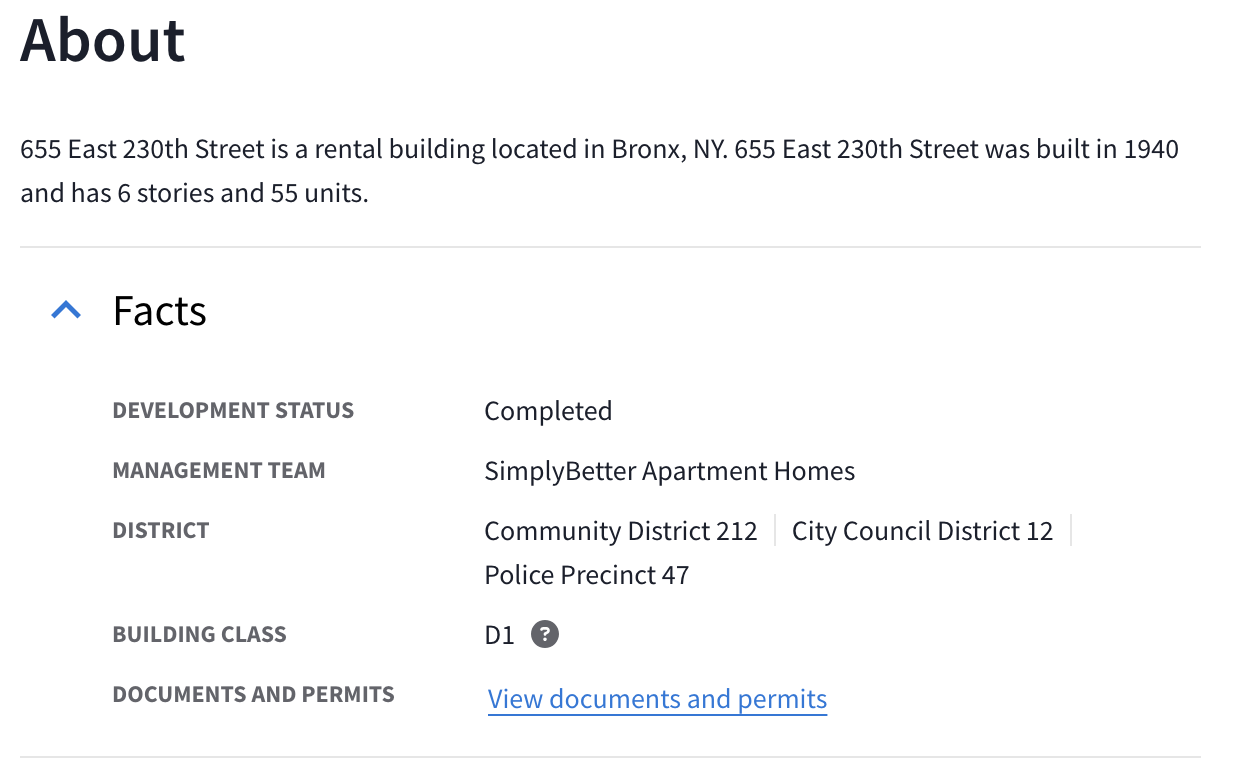

In [301]:
from IPython.display import Image
Image('655 EAST 230 STREET 1.png')

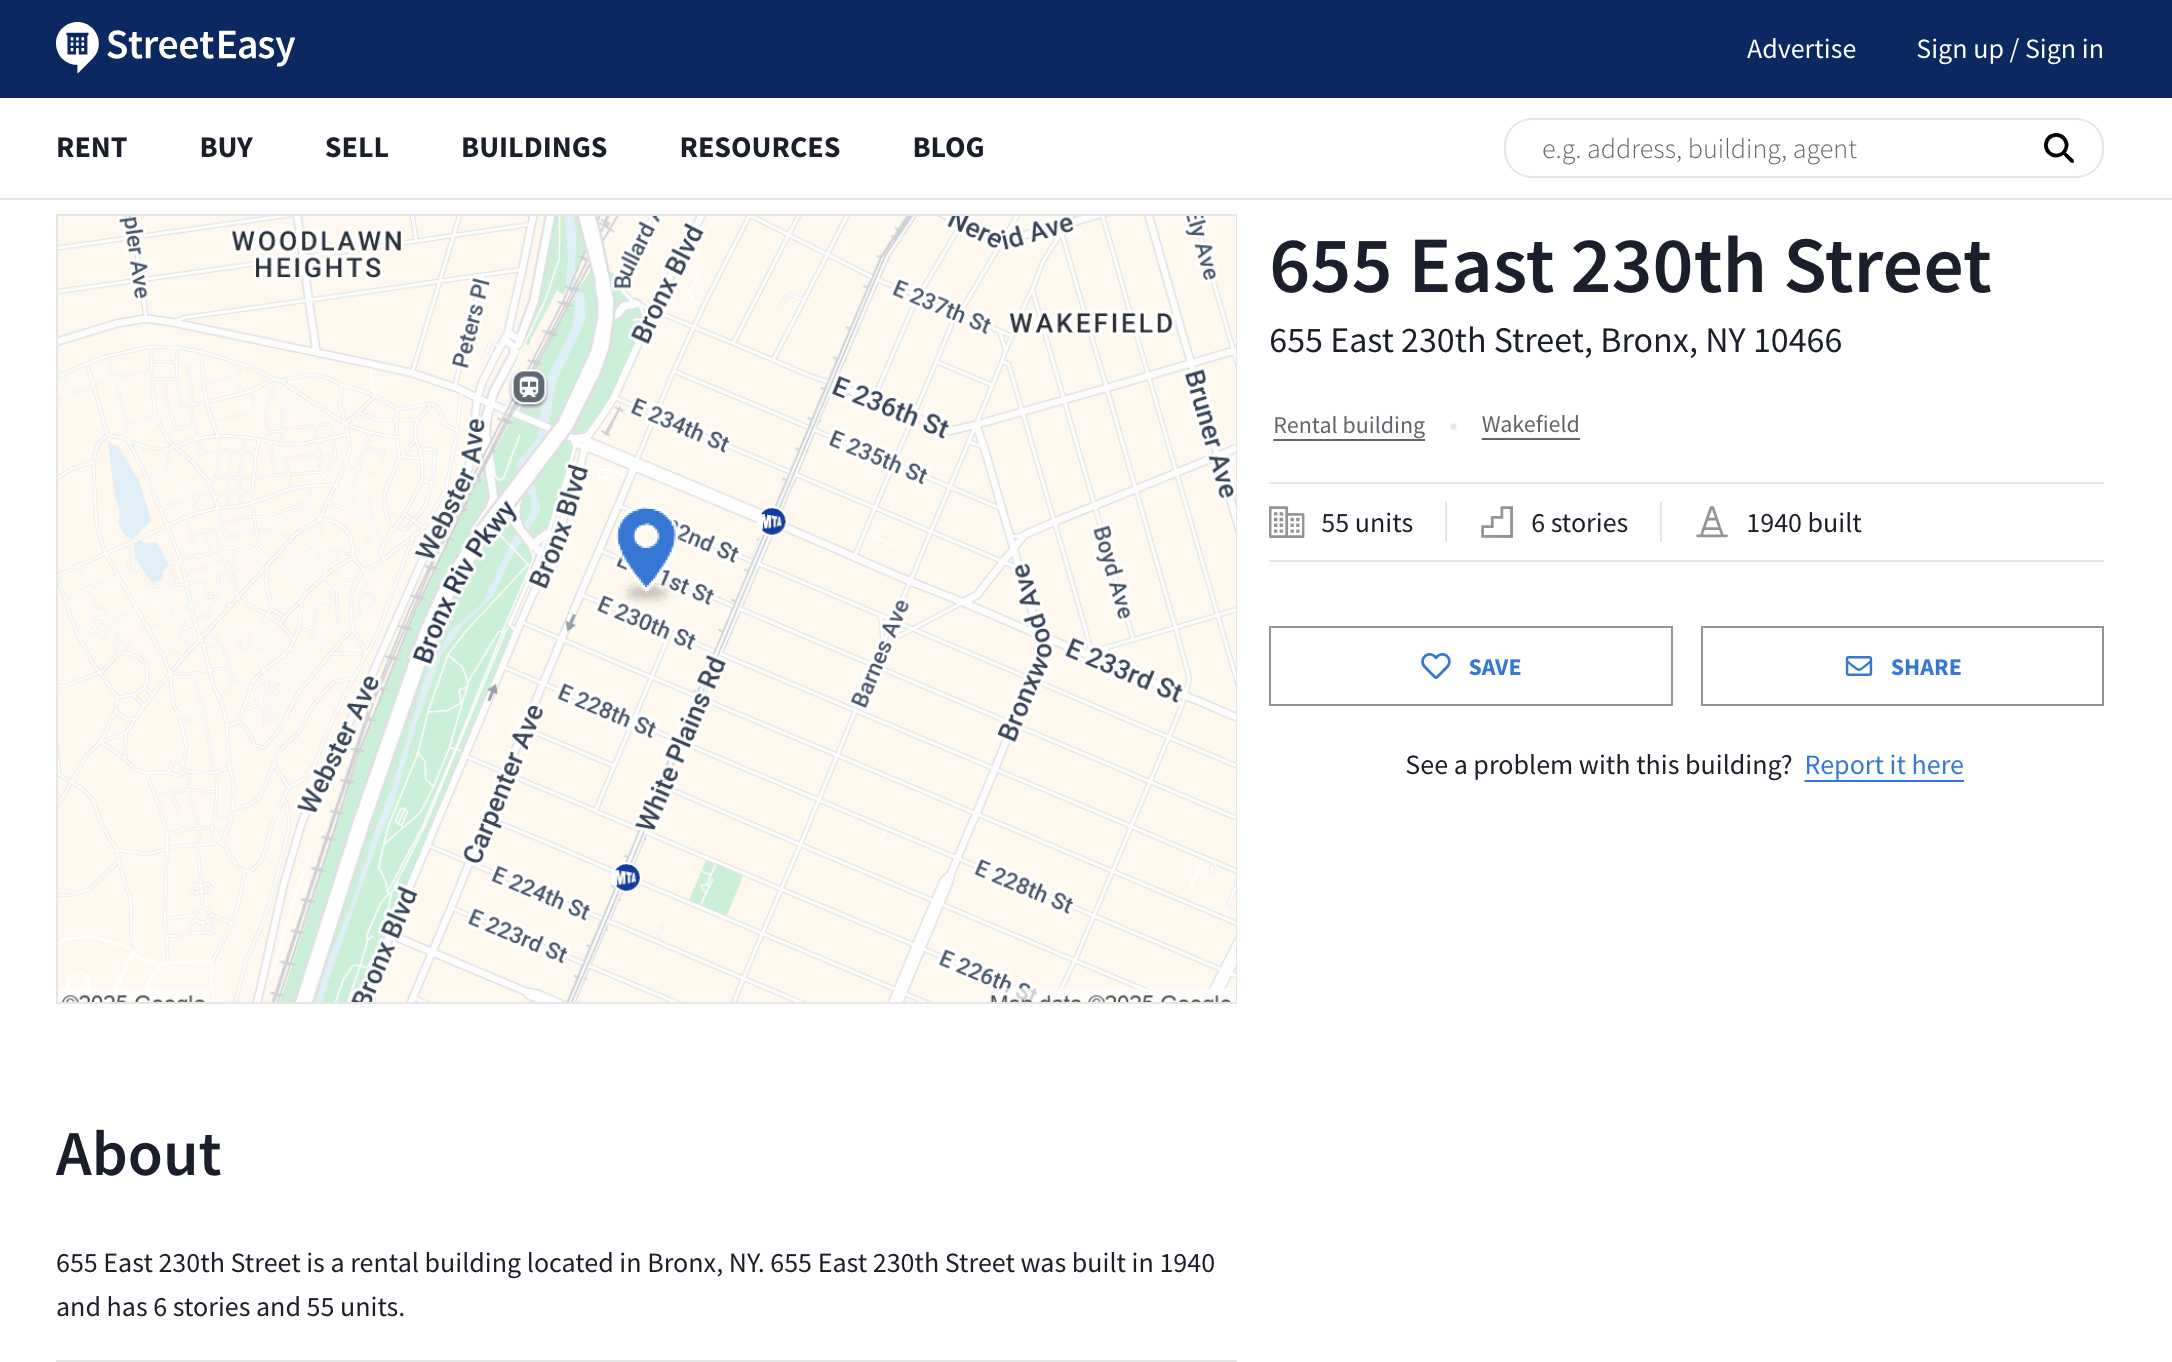

In [302]:
from IPython.display import Image
Image('655 EAST 230 STREET 2.png')

Some interesting news article - most noise source: **common party noise**.  \
"
In 2024, New Yorkers called in a total of 753,222 noise complaints. Incredibly, almost 10 percent of them came from residents of Bronx Community District 12, which encompasses several neighborhoods including Williamsbridge and Baychester. Of the 73,014 complaints there, 69,781 concerned residential noise.

George Torres, a manager for Bronx Community District 12, said parties and loud music are common in the area. 'The attitude of the environment up here is very permissive,” he said. “You have businesses that listen to music right on the street.' " -NYT

**Bronx Community District 12**, where this building, called Wakefield Complex was located.
Source: https://www.nytimes.com/2025/01/30/realestate/new-york-citys-noisiest-neighborhoods.html



In [303]:
list(complaint_counts_by_bbl.bbl.head(20))

[2048330028,
 2025110068,
 4015110001,
 4068290001,
 2029020036,
 4114340007,
 3042719001,
 2031430130,
 3000680001,
 4005790036,
 2039447501,
 2048330027,
 2032367501,
 1020260029,
 2028820229,
 1020350001,
 2037140054,
 2039437501,
 3013020001,
 1017970001]

In [304]:
bbl_list = [2025110068, 4015110001,4068290001,2029020036,4114340007,3042719001,2031430130,3000680001,4005790036,2039447501,2048330027,2032367501,
 1020260029,2028820229,1020350001,2037140054,2039437501,3013020001,1017970001]
building_info2 = bbl_df[bbl_df['bbl'].isin(bbl_list)]
building_info2[['bbl', 'address', 'borough', 'numfloors', 'unitsres', 'yearbuilt', 'building_size_category']]


,bbl,address,borough,numfloors,unitsres,yearbuilt,building_size_category
122682,4015110001,40-45 ELBERTSON STREET,QN,6.0,235.0,1950.0,mega
158524,1020260029,2400 ADAM C POWELL BLVD,MN,7.0,54.0,1905.0,very large
167913,1020350001,2802 FREDRICK DOUGLASS BL,MN,6.0,538.0,1928.0,mega
257362,2037140054,1025 BOYNTON AVENUE,BX,6.0,61.0,1931.0,very large
262832,2031430130,2176 TIEBOUT AVENUE,BX,6.0,60.0,1927.0,very large
297477,3013020001,1720 BEDFORD AVENUE,BK,25.0,1321.0,1960.0,mega
409947,4005790036,31-35 CRESCENT STREET,QN,6.0,122.0,1961.0,mega
472448,4114340007,88-08 151 AVENUE,QN,6.0,149.0,1962.0,mega
475258,2039447501,9 METROPOLITAN OVAL,BX,13.0,3857.0,1940.0,mega
476739,2028820229,16 RICHMAN PLAZA,BX,44.0,1654.0,1973.0,mega


In [70]:
# bbl_evictions['bbl'] = bbl_evictions['bbl'].astype('int64')

In [69]:
# bbl_evictions[bbl_evictions['bbl_clean'].isin(bbl_list)][["bbl", 'average_year_eviction_count']]

In [305]:
additional_stats = {
    'median': f"{complaint_counts_by_bbl['complaint_count'].median():.0f}",
    'mode': f"{complaint_counts_by_bbl['complaint_count'].mode()[0]:.0f}",
    'range': f"{complaint_counts_by_bbl['complaint_count'].max() - complaint_counts_by_bbl['complaint_count'].min():.0f}",
    'iqr': f"{complaint_counts_by_bbl['complaint_count'].quantile(0.75) - complaint_counts_by_bbl['complaint_count'].quantile(0.25):.0f}",
    'skew': f"{complaint_counts_by_bbl['complaint_count'].skew():.2f}",
    'kurtosis': f"{complaint_counts_by_bbl['complaint_count'].kurtosis():.2f}",
    'sum': f"{complaint_counts_by_bbl['complaint_count'].sum():.0f}",
    'variance': f"{complaint_counts_by_bbl['complaint_count'].var():.0f}"
}
additional_stats

{'median': '2',
 'mode': '1',
 'range': '56958',
 'iqr': '7',
 'skew': '247.77',
 'kurtosis': '102770.00',
 'sum': '5785456',
 'variance': '17393'}

In [306]:
top_complaint_buildings = complaint_counts_by_bbl.head(40)
top_complaint_buildings

,bbl,complaint_count
71080,2048330028,56959
39882,2025110068,10091
224142,4015110001,9835
261964,4068290001,9574
46122,2029020036,8165
294457,4114340007,7931
149309,3042719001,7233
50163,2031430130,6792
80293,3000680001,6556
209745,4005790036,6360


## To do correlation analysis, we will remove the top 2 buildings, as they are outliers, and mostly due to technical errors. \
buildings: 2048330080, 2048330028

In [308]:
non_covid_df_filerted = non_covid_df[~non_covid_df['bbl'].isin([2048330028])]

In [231]:
bbl_evictions.bbl.dtype, bbl_evictions.bbl_clean.dtype, non_covid_df_filerted.bbl.dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

In [214]:
bbl_evictions = bbl_evictions.drop(columns=['bbl'])
bbl_evictions = bbl_evictions.rename(columns={'bbl_clean': 'bbl'})

In [309]:
bbl_evictions['bbl'] = bbl_evictions['bbl'].astype('int64')
non_covid_df_filerted['bbl'] = non_covid_df_filerted['bbl'].astype('int64')

In [311]:
complaints_by_bbl = non_covid_df_filerted.groupby('bbl').size().reset_index(name='complaint_count')

In [312]:
complaints_by_bbl.complaint_count.describe()
# the top 2 are no longer included

,complaint_count
count,339932.000000
mean,16.851891
std,88.627039
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,10091.000000


In [313]:
bbl_evcitions_311_df = pd.merge(
    bbl_evictions,
    complaints_by_bbl,
    on='bbl',
    how='left'
)

In [314]:
bbl_evcitions_311_df.head()

,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,eviction_postcode,ejectment,eviction/legal_possession,latitude,...,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,complaint_count
0,34859/16,53416,3476 SEYMOUR AVENUE,3-B,2017-01-03,BRONX,10469,Not an Ejectment,Possession,40.877620,...,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,True,mega,Q4 (largest 25%),1930-1939,191.0
1,B57808/16,74242,1426 BRYANT AVENUE,10 AKA 2ND FL UNIT,2017-01-03,BRONX,10459,Not an Ejectment,Possession,40.830691,...,low-rise,"1994–Present, vacancy decontrol","1981–2000, Post-Modernism","1991–2008, modern economic growth",2-unit,False,small,Q3 (50-75%),1990-1999,2.0
2,N069212/14,355977,1309 5TH AVENUE,24H,2017-01-03,MANHATTAN,10029,Not an Ejectment,Possession,40.797309,...,high-rise,"1970–1993, deregularization","1951–1980, the International Style, Alternativ...","1946–1975, pst war economic boom",100+ units,False,mega,Q4 (largest 25%),1970-1979,1722.0
3,K065455/16,367441,458 EAST 51 STREET,6A,2017-01-03,BROOKLYN,11203,Not an Ejectment,Possession,40.650624,...,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",21-100 units,True,very large,Q4 (largest 25%),1940-1949,224.0
4,33992/16,458984,580 EAST 168TH STREE T,*,2017-01-03,BRONX,10456,Not an Ejectment,Possession,40.830494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [315]:
nan_count = bbl_evcitions_311_df['complaint_count'].isna().sum()
nan_count, \
print(f"percentage of rows with missing complaint_count: {nan_count / len(bbl_evcitions_311_df) * 100:.2f}%")
# about 6.12 of buildings do not have any 311 complaints in those five years.
# safe to ignore them and just fillna

percentage of rows with missing complaint_count: 6.19%


(np.int64(4584), None)

In [318]:
bbl_evcitions_311_df['complaint_count'] = bbl_evcitions_311_df['complaint_count'].fillna(0)
# fill the nan cells with 0

In [319]:
# correlation between eviction counts and complaint counts
eviction_complaint_corr = bbl_evcitions_311_df.groupby('bbl').agg({
    'court_index_number': 'count',
    'complaint_count': 'first'
}).corr()
print("Correlation between evictions and complaints:")
print(eviction_complaint_corr)

Correlation between evictions and complaints:
                    court_index_number  complaint_count
court_index_number            1.000000         0.520563
complaint_count               0.520563         1.000000


It shows a moderate strength: \
A correlation of 0.52 is moderate, slightly higer than 0.43 (covid times). It's not weak, but it's also not overwhelming. This indicates that while there is a clear relationship, many other factors also influence eviction rates beyond just complaint counts. This is understandable in complex social phenomenon like housing and evictions in NYC.

In [320]:
bbl_evcitions_311_df.to_csv('/content/drive/My Drive/X999/bbl_evcitions_311_df_groupby_bbl.csv', index=False)

## To preserve all the complaint type details and find their correlations between the complaint types and the number of evictions, we need to do a simple merge that will result with most details.

In [321]:
non_covid_df_filerted.shape, bbl_evictions.shape

((5728497, 10), (74082, 40))

In [245]:
# all_years_df_filtered = covid_df[covid_df['bbl'] != 2048330028]

In [322]:
complaints_by_bbl = non_covid_df_filerted.groupby('bbl').size().reset_index(name='complaint_count')

In [323]:
evictions_by_bbl = bbl_evictions.groupby('bbl').size().reset_index(name='eviction_count')

In [324]:
bbl_complaints_evictions = complaints_by_bbl.merge(evictions_by_bbl, on='bbl', how='outer').fillna(0)

In [325]:
complaint_type_counts = covid_df_filtered.groupby(['bbl', 'complaint_type']).size().reset_index(name='type_count')
complaint_type_pivot = complaint_type_counts.pivot_table(
    index='bbl',
    columns='complaint_type',
    values='type_count',
    fill_value=0
)

In [326]:
final_analysis_df = bbl_complaints_evictions.set_index('bbl').join(complaint_type_pivot)

In [327]:
complaint_type_pivot.shape, complaints_by_bbl.shape, covid_df_filtered.shape, bbl_evictions.shape

((279397, 66), (339932, 2), (3726138, 10), (74082, 40))

In [328]:
correlations = {}
for column in complaint_type_pivot.columns:
    correlation = final_analysis_df['eviction_count'].corr(final_analysis_df[column])
    correlations[column] = correlation
# correlations

In [329]:
sorted_correlations = dict(sorted(correlations.items(), key=lambda item: item[1], reverse=True))
for complaint_type, correlation in sorted_correlations.items():
    print(f"Complaint type: {complaint_type}, correlation with evictions: {correlation:.3f}")

Complaint type: WATER LEAK, correlation with evictions: 0.520
Complaint type: PLUMBING, correlation with evictions: 0.511
Complaint type: APPLIANCE, correlation with evictions: 0.478
Complaint type: Elevator, correlation with evictions: 0.454
Complaint type: UNSANITARY CONDITION, correlation with evictions: 0.439
Complaint type: PAINT/PLASTER, correlation with evictions: 0.408
Complaint type: DOOR/WINDOW, correlation with evictions: 0.342
Complaint type: ELECTRIC, correlation with evictions: 0.326
Complaint type: GENERAL, correlation with evictions: 0.255
Complaint type: HEAT/HOT WATER, correlation with evictions: 0.253
Complaint type: FLOORING/STAIRS, correlation with evictions: 0.245
Complaint type: SAFETY, correlation with evictions: 0.238
Complaint type: Illegal Fireworks, correlation with evictions: 0.232
Complaint type: Construction Lead Dust, correlation with evictions: 0.210
Complaint type: Noise - Residential, correlation with evictions: 0.205
Complaint type: Asbestos, correla

With outliers removed, all correlations became more moderate.

### Strong to moderate correlations (0.4-0.52)
1. **WATER LEAK (0.520)**: showing plumbing issues
2. **PLUMBING (0.511)**: general plumbing problems
3. **APPLIANCE (0.478)**: ssues with appliances
4. **Elevator (0.454)**: elevator malfunctions
5. **UNSANITARY CONDITION (0.439)**: hygiene and cleanliness issues
6. **PAINT/PLASTER (0.408)**: wall condition problems

### Moderate Correlations (0.2-0.4)
7. **DOOR/WINDOW (0.342)**: entry/exit and security
8. **ELECTRIC (0.326)**: electrical system issues
9. **GENERAL (0.255)**: eeneral building problems
10. **HEAT/HOT WATER (0.253)**: heating system issues
11. **FLOORING/STAIRS (0.245)**: floor and stair conditions
12. **SAFETY (0.238)**: safety concerns
13. **Illegal Fireworks (0.232)**: nuisance issues
14. **Construction Lead Dust (0.210)**: environmental hazard
15. **Noise - Residential (0.205)**: noise from other units
